In [41]:
# necessery libraries
import pandas as pd
import sys
sys.path.insert(0,'../src/utils/')
import general_look_at_data as  GLAD
import cleaning_data as  CLD

In [42]:
# data source must be updated to featsel folder rather than raw
data = pd.read_csv('../data/featsel/Citywide_Survey_featsel.csv')

In [43]:
data.shape

(3346, 156)

# Handle Missing data

In [44]:
# Display missing percentages
feature_missing_stats = GLAD.get_feature_missing(data)
feature_missing_stats

,missing_count,missing_percentage,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,,,
school_park_amount_week,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
work_park_amount_year,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_day,3340,0.998207,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_month,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_year,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
...,...,...,...,...,...,...,...,...
school_bike_park,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_bike,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_taxi,0,0.000000,0.0,0.0,0.0,0.000000,0.998207,int64


## Handle Direct Missing Data

In [45]:
# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

# Display result
direct_missing

,missing_count,missing_percentage
feature,,
school_park_amount_week,3342,0.998805
work_park_amount_year,3342,0.998805
school_park_amount_day,3340,0.998207
school_park_amount_month,3339,0.997908
school_park_amount_year,3339,0.997908
work_park_amount_week,3334,0.996414
work_park_amount_month,3324,0.993425
work_park_amount_day,3322,0.992827
school_cms_zone,3224,0.963539


In [46]:
# Get the list of columns with more than 75% direct missing values
features_gt75_missing = CLD.filter_direct_missing_columns(direct_missing, None, 0.75)

# Display the feature list
features_gt75_missing

['school_park_amount_week',
 'work_park_amount_year',
 'school_park_amount_day',
 'school_park_amount_month',
 'school_park_amount_year',
 'work_park_amount_week',
 'work_park_amount_month',
 'work_park_amount_day',
 'school_cms_zone']

In [47]:
# Delete all features that has more than 75% of direct missing data
CLD.delete_columns(data, features_gt75_missing)

Current number of columns: 156
Updated number of columns: 147


In [48]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

In [49]:
# Get the list of columns with less than 75% direct missing values
features_st75_missing = CLD.filter_direct_missing_columns(direct_missing, None, 0)

# Display the feature list
features_st75_missing

['work_cms_zone']

In [50]:
# Fill in the columns with the column's mod value if the proportion of missing data is less than 75%
CLD.fill_by_mode(data, features_st75_missing)

Provided columns '['work_cms_zone']' successfully filled by mode value.


In [51]:
# Update direct missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the direct missing value, which is NaN, For each column with a percentage nonzero.
direct_missing = GLAD.display_direct_missing(feature_missing_stats)

# Display result
direct_missing

'No Missing Data: NAN type'

In [52]:
# Display final shape from this processing
data.shape

(3346, 147)

# Handle Indirect Missing Data

In [53]:
# Display the indirect missing value for each column with a percentage nonzero.
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,
license,0.0,0.041243,0.0,0.000000,0.000000,int64
tnc_purpose,0.0,0.000000,0.0,0.000000,0.409444,int64
car_share_none,0.0,0.027197,0.0,0.000000,0.000000,int64
car_share_other,0.0,0.027197,0.0,0.000000,0.000000,int64
car_share_enterprise,0.0,0.027197,0.0,0.000000,0.000000,int64
...,...,...,...,...,...,...
school_bike_park,0.0,0.000000,0.0,0.000000,0.997908,int64
school_mode_bike,0.0,0.000000,0.0,0.000000,0.997908,int64
school_mode_taxi,0.0,0.000000,0.0,0.000000,0.998207,int64


No valid data found for technological_error_percentage


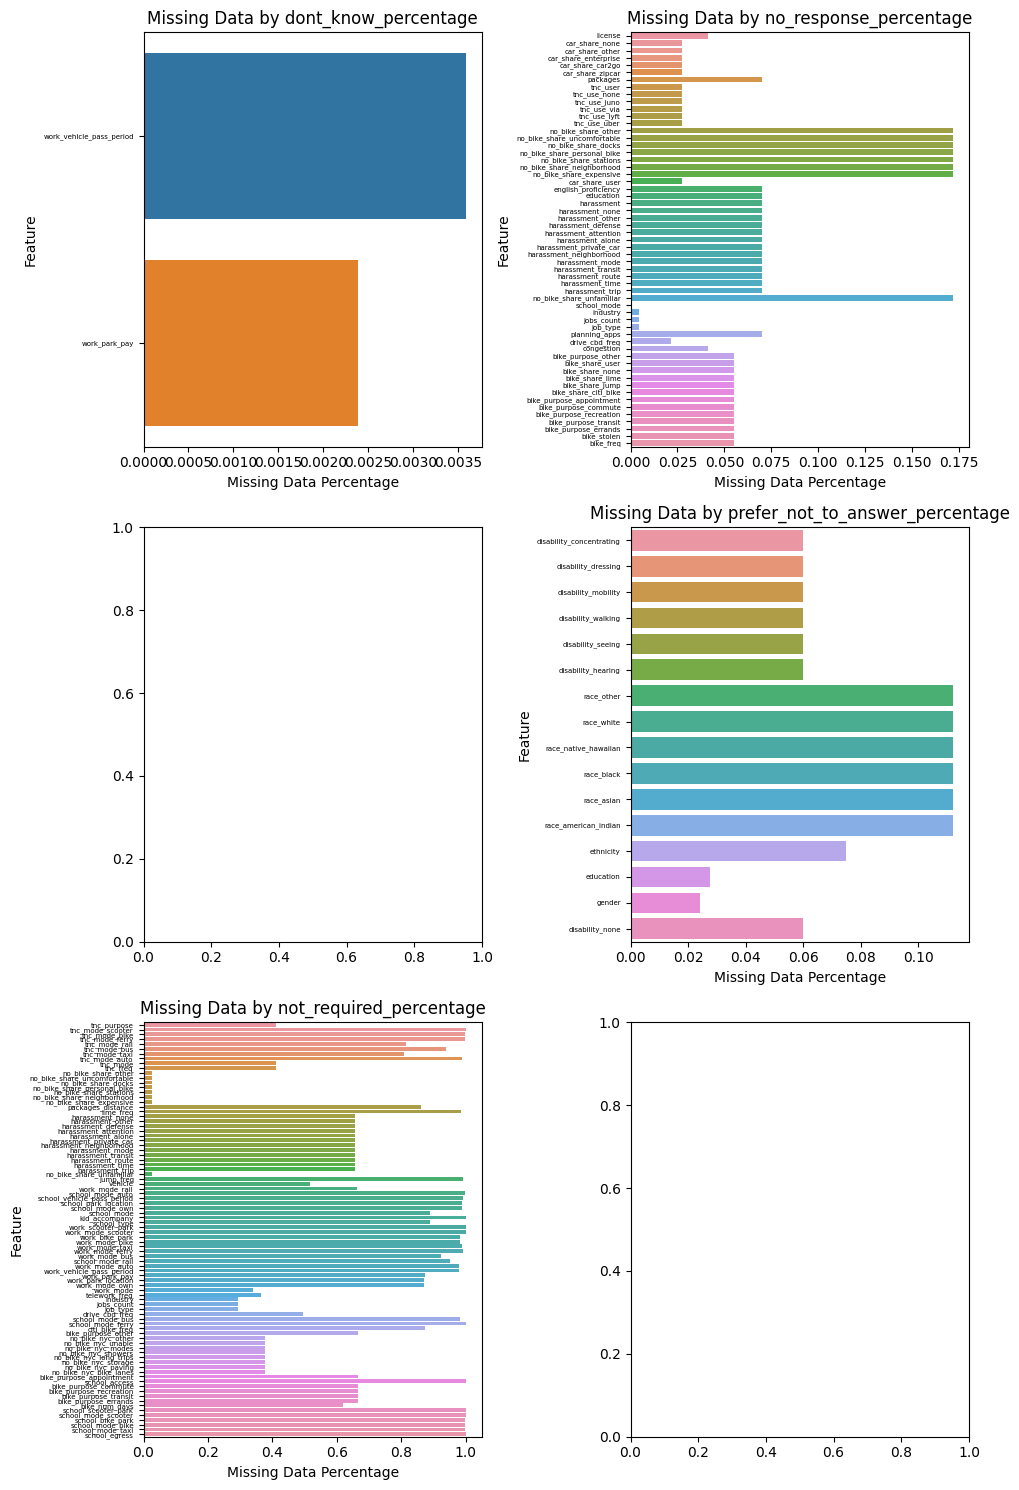

In [54]:
# Generate a visualization of the indirect missing data percentages for each feature
GLAD.plot_indirect_missing(indirect_missing)

I will **delete any features with 60% or more missing data**, regardless of the type of missing data. 

In [55]:
# Get the list of columns with more than 60% indirect missing values
features_gt60_missing = CLD.filter_indirect_missing_columns(indirect_missing, indirect_missing.columns, None, 0.6)

# Display the feature list
features_gt60_missing

../src/utils/cleaning_data.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_value = data.max(axis=1)
../src/utils/cleaning_data.py:89: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_value = data.min(axis=1)


['tnc_mode_scooter',
 'tnc_mode_bike',
 'tnc_mode_ferry',
 'tnc_mode_rail',
 'tnc_mode_bus',
 'tnc_mode_taxi',
 'tnc_mode_auto',
 'packages_distance',
 'lime_freq',
 'harassment_none',
 'harassment_other',
 'harassment_defense',
 'harassment_attention',
 'harassment_alone',
 'harassment_private_car',
 'harassment_neighborhood',
 'harassment_mode',
 'harassment_transit',
 'harassment_route',
 'harassment_time',
 'harassment_trip',
 'jump_freq',
 'work_mode_rail',
 'school_mode_auto',
 'school_vehicle_pass_period',
 'school_park_location',
 'school_mode_own',
 'school_mode',
 'kid_accompany',
 'school_type',
 'work_scooter_park',
 'work_mode_scooter',
 'work_bike_park',
 'work_mode_bike',
 'work_mode_taxi',
 'work_mode_ferry',
 'work_mode_bus',
 'school_mode_rail',
 'work_mode_auto',
 'work_vehicle_pass_period',
 'work_park_pay',
 'work_park_location',
 'work_mode_own',
 'school_mode_bus',
 'school_mode_ferry',
 'citi_bike_freq',
 'bike_purpose_other',
 'bike_purpose_appointment',
 'scho

In [56]:
# Delete all features that has more than 60% of indirect missing data
CLD.delete_columns(data, features_gt60_missing)

Current number of columns: 147
Updated number of columns: 87


In [57]:
# Update indirect missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Update the indirect missing values
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,
license,0.0,0.041243,0.0,0.000000,0.0000,int64
gender,0.0,0.000000,0.0,0.024208,0.0000,int64
tnc_use_juno,0.0,0.027496,0.0,0.000000,0.0000,int64
tnc_use_none,0.0,0.027496,0.0,0.000000,0.0000,int64
tnc_user,0.0,0.027496,0.0,0.000000,0.0000,int64
...,...,...,...,...,...,...
no_bike_share_stations,0.0,0.171847,0.0,0.000000,0.0263,int64
no_bike_share_personal_bike,0.0,0.171847,0.0,0.000000,0.0263,int64
no_bike_share_docks,0.0,0.171847,0.0,0.000000,0.0263,int64


No valid data found for dont_know_percentage
No valid data found for technological_error_percentage


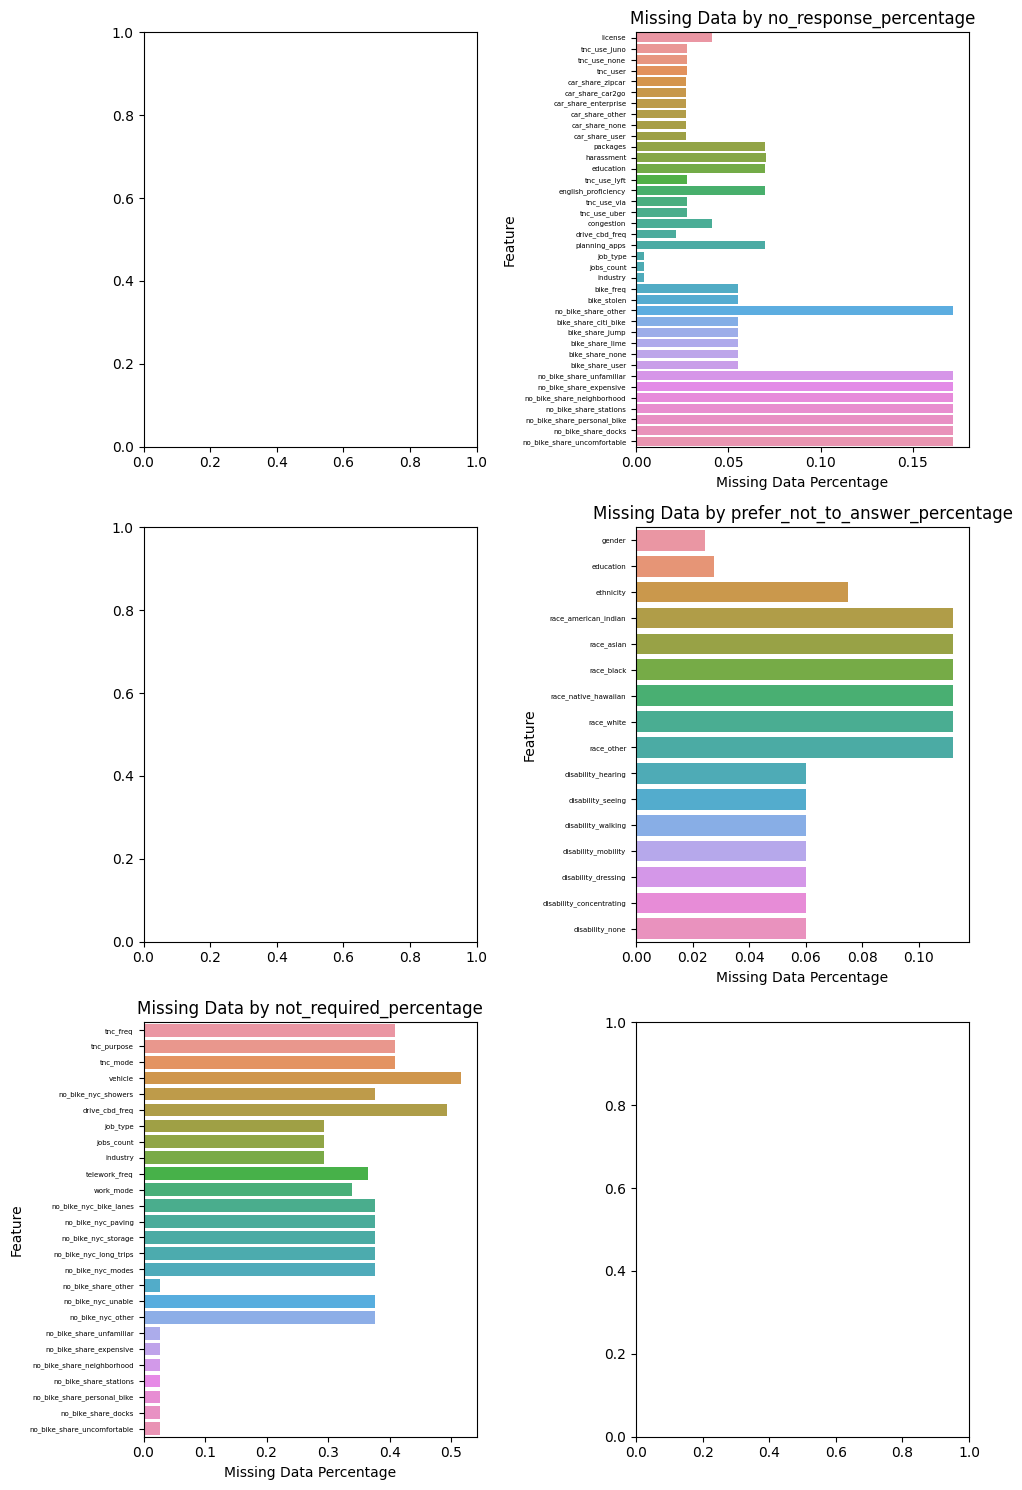

In [58]:
# Generate a visualization of the indirect missing data percentages for each feature
GLAD.plot_indirect_missing(indirect_missing)

The scale update to less that 60% of missing data. Now I will handle the remaining features. 

In [59]:
# Get the list of columns with less than 60% indirect missing values
features_st60_missing = CLD.filter_indirect_missing_columns(indirect_missing, indirect_missing.columns ,0.0, 0.6)

# Display the feature list
features_st60_missing

../src/utils/cleaning_data.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_value = data.max(axis=1)
../src/utils/cleaning_data.py:89: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_value = data.min(axis=1)


['license',
 'gender',
 'tnc_use_juno',
 'tnc_use_none',
 'tnc_user',
 'tnc_freq',
 'tnc_purpose',
 'tnc_mode',
 'car_share_zipcar',
 'car_share_car2go',
 'car_share_enterprise',
 'car_share_other',
 'car_share_none',
 'car_share_user',
 'packages',
 'harassment',
 'education',
 'tnc_use_lyft',
 'english_proficiency',
 'ethnicity',
 'race_american_indian',
 'race_asian',
 'race_black',
 'race_native_hawaiian',
 'race_white',
 'race_other',
 'disability_hearing',
 'disability_seeing',
 'disability_walking',
 'disability_mobility',
 'disability_dressing',
 'disability_concentrating',
 'tnc_use_via',
 'tnc_use_uber',
 'vehicle',
 'no_bike_nyc_showers',
 'congestion',
 'drive_cbd_freq',
 'planning_apps',
 'job_type',
 'jobs_count',
 'industry',
 'telework_freq',
 'work_mode',
 'bike_freq',
 'bike_stolen',
 'no_bike_nyc_bike_lanes',
 'no_bike_nyc_paving',
 'no_bike_nyc_storage',
 'no_bike_nyc_long_trips',
 'no_bike_nyc_modes',
 'no_bike_share_other',
 'no_bike_nyc_unable',
 'no_bike_nyc_oth

## Seperate Types of Columns
which is: one-hot, numeric and labeled features.

In [60]:
# Seperate the features based on type of data
one_hot_features, numeric_features, labeled_features = CLD.get_features_based_type(data, features_st60_missing)

Number of one-hot encoded features: 48
Samples of one-hot encoded features (sample size=5):


,license,tnc_use_juno,tnc_use_none,tnc_user,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,...,bike_share_none,bike_share_user,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,disability_none
184,1,0,0,1,0,1,0,0,0,1,...,0,1,-9998,-9998,-9998,-9998,-9998,-9998,-9998,1
3286,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
854,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1026,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
1466,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


Number of numeric features: 0
Number of labeled features: 19
Samples of labeled features (sample size=5):


,packages,congestion,education,english_proficiency,harassment,telework_freq,work_mode,tnc_purpose,drive_cbd_freq,industry,job_type,tnc_freq,vehicle,bike_freq,tnc_mode,jobs_count,ethnicity,gender,planning_apps
1327,1,2,7,1,4,8,105,7,995,16,1,7,995,5,105,1,1,2,7
813,3,1,7,1,4,8,105,7,995,7,1,7,995,1,106,1,1,1,1
3301,1,1,6,1,3,5,105,99,8,4,2,7,1,5,106,1,1,1,4
999,1,1,7,1,4,6,105,1,995,16,1,6,995,5,105,1,1,2,3
137,7,5,6,1,4,8,105,1,995,5,2,3,995,5,106,3,1,1,6


In [61]:
error_numeric_features = ['jobs_count']

# Remove the error features from labeled_features and add them to numeric_features
labeled_features = list(set(labeled_features).symmetric_difference(set(error_numeric_features)))
numeric_features.extend(error_numeric_features)

In [62]:
# Display the information of the numeric features list after updated
CLD.display_info_lists(data,("numeric", numeric_features))

Number of numeric features: 1
Samples of numeric features (sample size=5):


,jobs_count
784,1
1517,1
2975,995
3204,6
1722,995


## Types of Indirect Missing Data for each Features

In [63]:
# Calculate the indirect missing data percentages for numeric features
search_numeric = GLAD.get_feature_missing(data[numeric_features])

# Calculate the indirect missing values based on the calculated percentages
search_numeric = GLAD.display_indirect_missing(search_numeric)

# Display result
search_numeric.columns.drop('feature_type')

Index(['dont_know_percentage', 'no_response_percentage',
       'technological_error_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

I will handle **not required** missing data type by **constant value which is zero**, and the **no response** missing data type by **impute statistical value**.

In [64]:
# Calculate the indirect missing data percentages for encoded features
search_encoded = GLAD.get_feature_missing(data[one_hot_features])

# Calculate the indirect missing values based on the calculated percentages
search_encoded = GLAD.display_indirect_missing(search_encoded)

# Display result
search_encoded.columns.drop('feature_type')

Index(['dont_know_percentage', 'no_response_percentage',
       'technological_error_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

I will handle **features that encoded** in nature by **create new column encode for each of the missing data type**.

In [65]:
# Calculate the indirect missing data percentages for labeled features
search_labeled = GLAD.get_feature_missing(data[labeled_features])

# Calculate the indirect missing values based on the calculated percentages
search_labeled = GLAD.display_indirect_missing(search_labeled)

# Display result
search_labeled.columns.drop('feature_type')

Index(['dont_know_percentage', 'no_response_percentage',
       'technological_error_percentage', 'prefer_not_to_answer_percentage',
       'not_required_percentage'],
      dtype='object')

We will handle **labeled data** by **encoding with missing data type** in the _encoding_ process.

## Handle Numeric Data

In [66]:
# Fill numeric columns that have 995 and -9998 indirect missing label by 0 and mode value
CLD.fill_numeric(data, numeric_features, [995, -9998])

Numeric values have been filled successfully.


In [67]:
# Display the counts of uniques value for numeric feature
data[numeric_features].value_counts()

jobs_count
1             2046
0              984
2              231
3               57
6               17
4                8
5                3
dtype: int64

# Handle Encoded Feature

In [68]:
# Define a list of prefixes for the encoded feature names
prefixes = ['license', 'tnc_user', 'tnc_use_', 'bike_', 'no_bike_nyc_', 'bike_share_', 'disability_', 'race_', 'no_bike_share_', 'car_share_']

# Group features with the same prefix
encoded_columns_names_dict = CLD.grouping_encoded_features(prefixes, one_hot_features)

# Display result
encoded_columns_names_dict

{'license': ['license'],
 'tnc_user': ['tnc_user'],
 'tnc_use_': ['tnc_use_juno',
  'tnc_use_none',
  'tnc_use_lyft',
  'tnc_use_via',
  'tnc_use_uber'],
 'bike_': ['bike_stolen',
  'bike_share_citi_bike',
  'bike_share_jump',
  'bike_share_lime',
  'bike_share_none',
  'bike_share_user'],
 'no_bike_nyc_': ['no_bike_nyc_showers',
  'no_bike_nyc_bike_lanes',
  'no_bike_nyc_paving',
  'no_bike_nyc_storage',
  'no_bike_nyc_long_trips',
  'no_bike_nyc_modes',
  'no_bike_nyc_unable',
  'no_bike_nyc_other'],
 'bike_share_': ['bike_share_citi_bike',
  'bike_share_jump',
  'bike_share_lime',
  'bike_share_none',
  'bike_share_user'],
 'disability_': ['disability_hearing',
  'disability_seeing',
  'disability_walking',
  'disability_mobility',
  'disability_dressing',
  'disability_concentrating',
  'disability_none'],
 'race_': ['race_american_indian',
  'race_asian',
  'race_black',
  'race_native_hawaiian',
  'race_white',
  'race_other'],
 'no_bike_share_': ['no_bike_share_other',
  'no_bik

In [69]:
# missing-codes to handle it 
missing_codes = [999, 995, -9998]

# handle missing-code data with function 
data = CLD.handle_missing_codes_encoded_features(data, missing_codes, encoded_columns_names_dict)

# Handle Missing in ordinal features

In [70]:
# ordinal features to relabel missing-codes 
ordinal_feature = ['tnc_freq', 'telework_freq', 'planning_apps', 'drive_cbd_freq', 'congestion', 'english_proficiency', 'bike_freq', 'education', 'age']

In [71]:
# new labels for replacing missing codes
new_labels = [-2, -1, 0]

# replace missing codes with new labels
data = CLD.convert_missing_to_label(data, ordinal_feature, missing_codes, new_labels)

In [77]:
# Update indirect missing data percentages
feature_missing_stats = GLAD.get_feature_missing(data)

# Display the indirect missing value
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)

# Display result
indirect_missing

,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,
vehicle,0.0,0.000000,0.0,0.000000,0.515541,int64
job_type,0.0,0.004483,0.0,0.000000,0.294082,int64
industry,0.0,0.004483,0.0,0.000000,0.294082,int64
work_mode,0.0,0.000000,0.0,0.000000,0.338912,int64
tnc_purpose,0.0,0.000000,0.0,0.000000,0.409444,int64
tnc_mode,0.0,0.000000,0.0,0.000000,0.409444,int64
packages,0.0,0.069934,0.0,0.000000,0.000000,int64
harassment,0.0,0.070233,0.0,0.000000,0.000000,int64
gender,0.0,0.000000,0.0,0.024208,0.000000,int64


In [78]:
# Display final shape from this processing
data.shape

(3346, 117)

# Share the Ready Dataset

Except for the _labels features_, which will be handled by the _transformation process_, **this file includes data that is free of in/direct missing data.**

In [79]:
# Share clean data 
data.to_csv("../data/processed/data_need_trans.csv", index=False)